# Import necessary libraries #

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

TRAIN_DATASET = os.path.join('dataset', 'train.csv') 
TEST_DATASET= os.path.join('dataset', 'test.csv')

# Data Preprocessing #

In [2]:
dataset = pd.read_csv(TRAIN_DATASET)
df = dataset.copy()
df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Given that this is a Kaggle provided dataset, it has already been labeled appropiately. Considering the description of the columns provided in [dataset/data_description.txt](dataset/data_description.txt), it is important to note that `NaN` values are important. They are required feature values for some of the houses. Therefore, `NaN` values will not  be discarded.

The column to predict is the `SalesPrice` column.

We don't need the `Id` column.

In [3]:
df = df.drop('Id', axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

`MSSubClass` feature has `int64` data type but taking a look at the `description.txt` file, it is clear this is a categorical feature. Therefore, we will make it a categorical feature of string data type.

In [5]:
ms_subclass_mapping = {20: 'MSSSubClass_20', 30: 'MSSSubClass_30', 40: 'MSSSubClass_40', 45: 'MSSSubClass_45', 
                       50: 'MSSSubClass_50', 60: 'MSSSubClass_60', 70: 'MSSSubClass_70', 75: 'MSSSubClass_75', 
                       80: 'MSSSubClass_80', 85: 'MSSSubClass_85', 90: 'MSSSubClass_90', 120: 'MSSSubClass_120', 
                       150: 'MSSSubClass_150', 160: 'MSSSubClass_160', 180: 'MSSSubClass_180', 
                       190: 'MSSSubClass_190'}
df['MSSubClass'] = df['MSSubClass'].map(ms_subclass_mapping)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,MSSSubClass_60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,MSSSubClass_20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,MSSSubClass_60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,MSSSubClass_70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,MSSSubClass_60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


There are specific columns with `NaN` values which, according to the description file, are meant to be `NA` string values. Columns with these values will be converted appropiately.

In [6]:
nan_columns = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
              'GarageType',  'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
for column in nan_columns:
    df[column].replace({np.nan: 'NA'}, inplace=True)
    
# Specifically replace MasVnrType nan values with None
df['MasVnrType'].replace({np.nan: 'None'}, inplace=True)
    
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,MSSSubClass_60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,MSSSubClass_20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,MSSSubClass_60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,MSSSubClass_70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,MSSSubClass_60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


# Exploratory Data Analysis #

Conceptually, it is expected that larger houses cost more than smaller houses. Examining the correlation and relationship between measurements in square feet and its effect on the house price will give an understanding of how the features affect the cost. It will also help in identifying outliers and removing them.

In [7]:
columns = ['SalePrice', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
           '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
           'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']

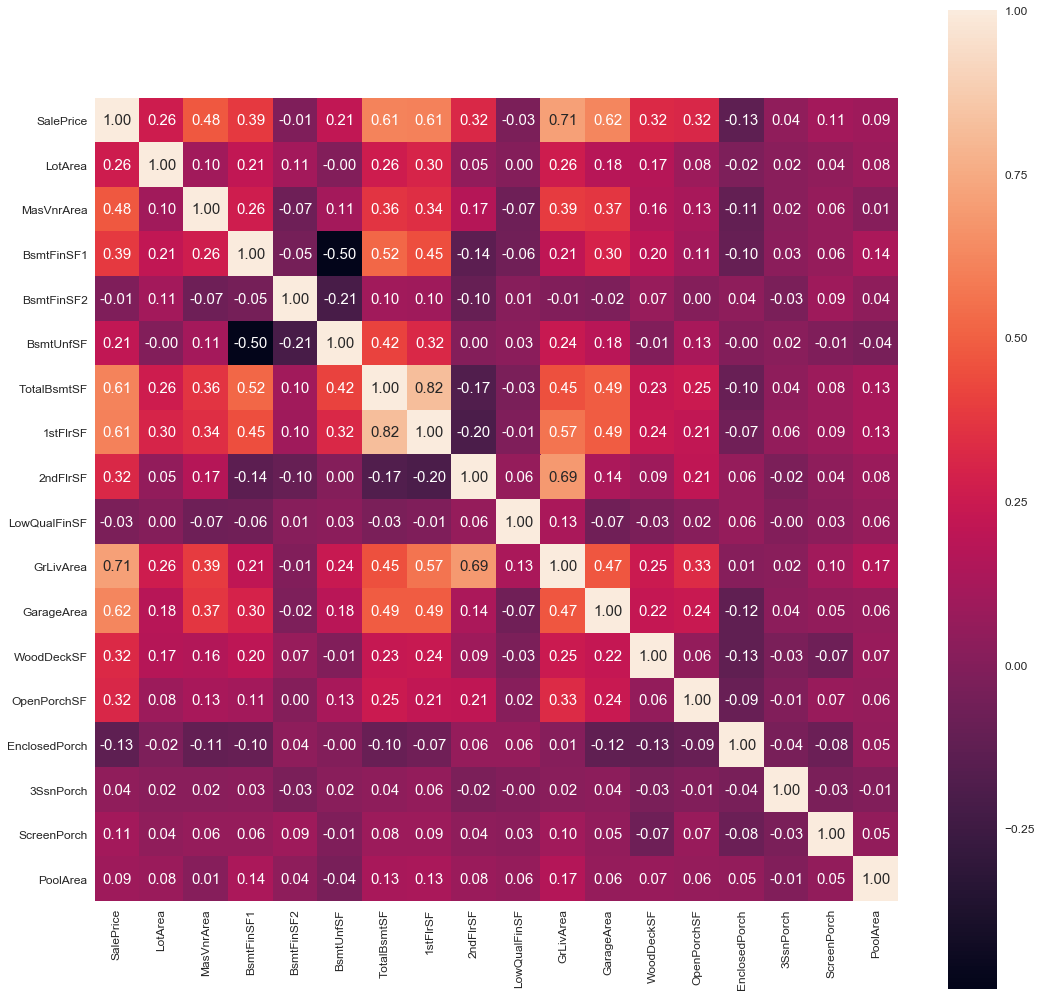

In [8]:
def show_corr_heatmap(cols):
    plt.figure(figsize=(18, 18))
    sns.set(font_scale=1.2)
    sns.heatmap(df[cols].corr(), cbar=True, annot=True, square=True, fmt='.2f', 
                annot_kws={'size': 15}, yticklabels=cols, xticklabels=cols)
    plt.show()
    
show_corr_heatmap(columns)

Plotting set 1


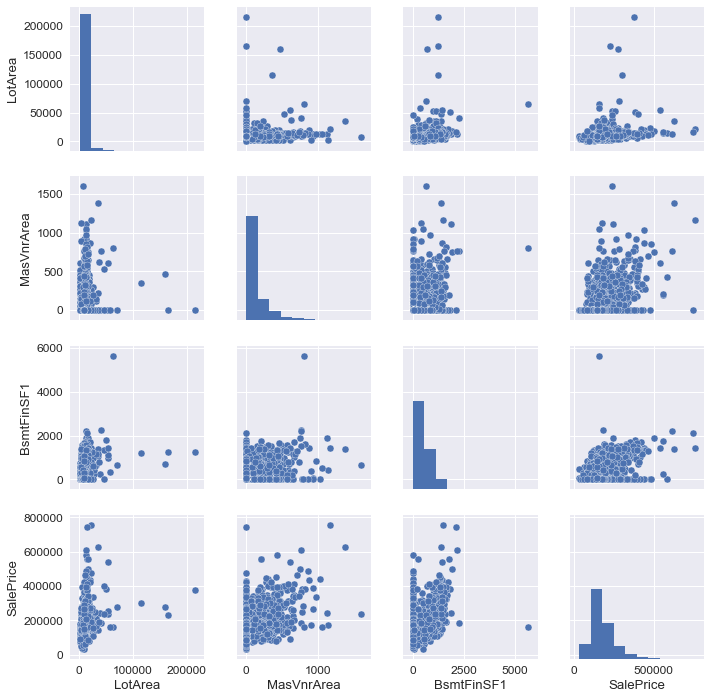

Plotting set 2


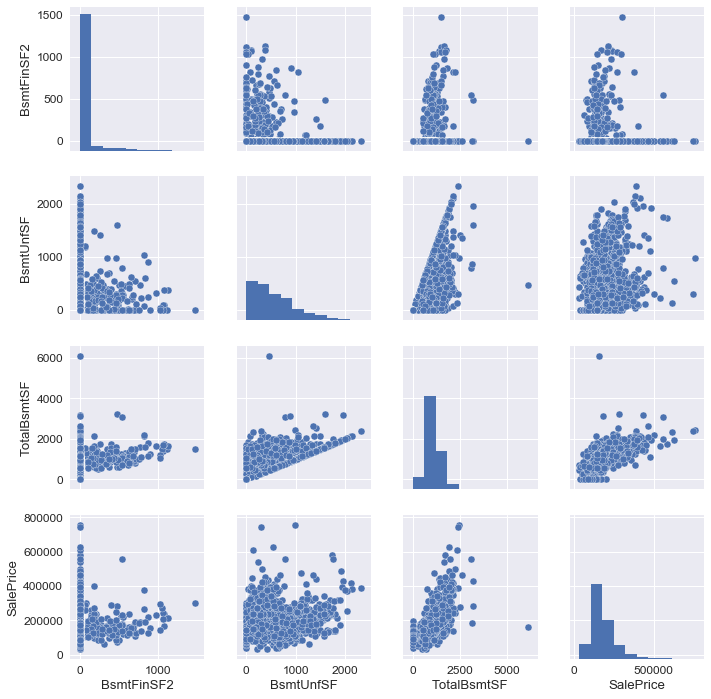

Plotting set 3


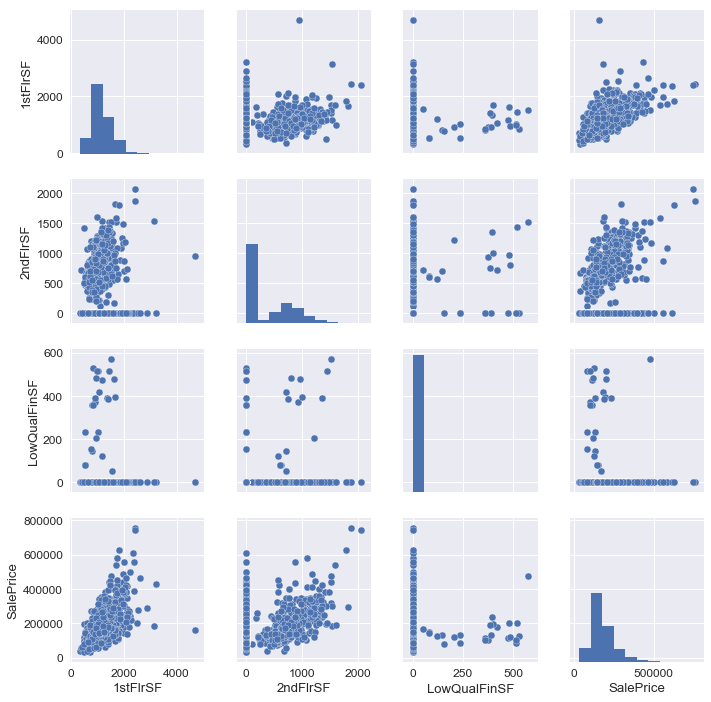

Plotting set 4


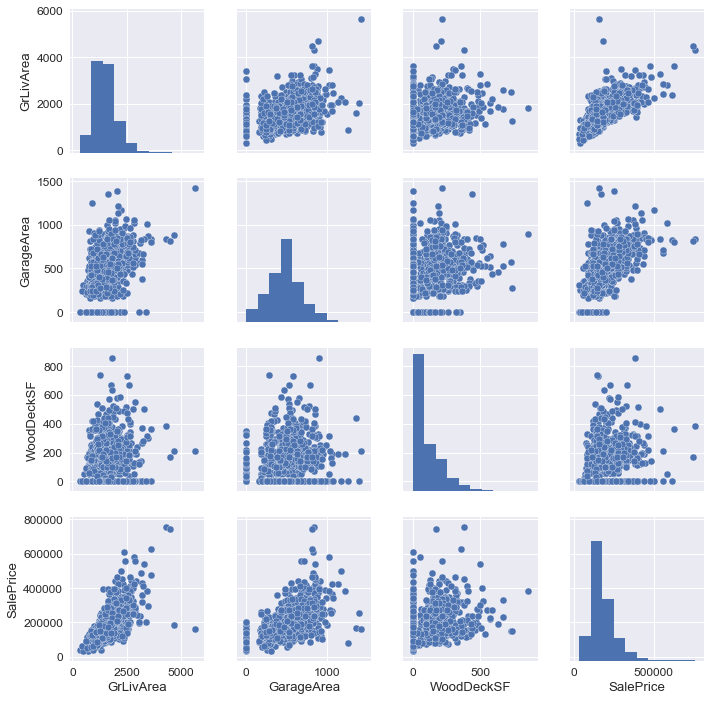

Plotting set 5


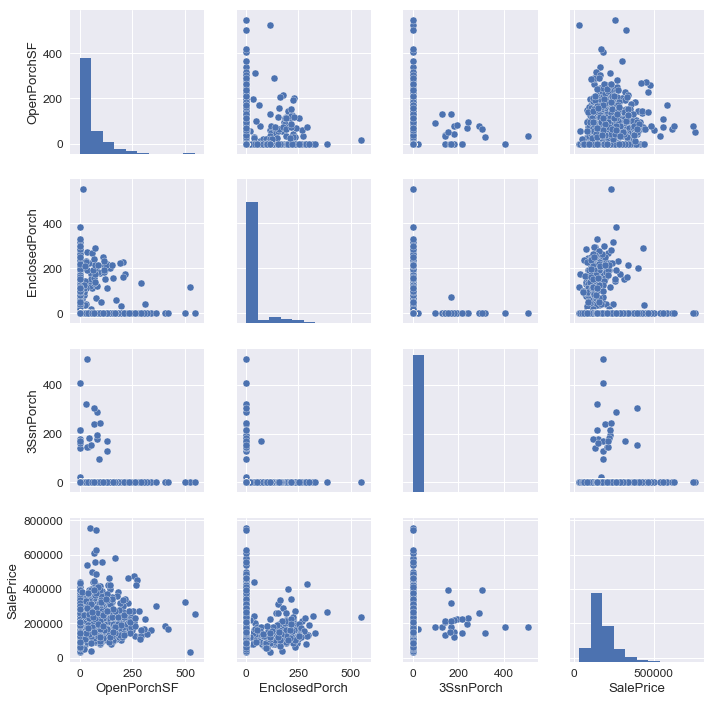

Plotting set 6


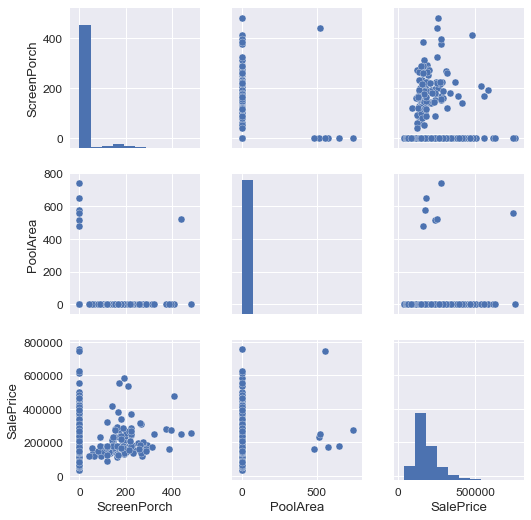

In [9]:
import math

# Plot correlations between measurements and sale price
def show_corr_plot(cols):
    sns.pairplot(df[cols].dropna())
    plt.show()

graphs_per_plot = 3  # Number of graphs to plot per page + 1 (sale price)
c = columns[1:]

for i in range(math.ceil(len(columns) / graphs_per_plot)):
    print('Plotting set {}'.format(i+1))
    cols = c[graphs_per_plot*i:graphs_per_plot*(i+1)]
    cols.append(columns[0])
    show_corr_plot(cols)
    print('=====================================================================================')

There are a few outliers that can be spotted in a few of the features. `LotArea` has some abnormalies because its expected that a larger lot area should correspond to a higher sale price (although other conditions could reduce the sale price large lots). `MasVnrArea` has similar outliers to `LotArea`. `TotalBsmtSF` which is the combination of `BsmtFinSF1`, `BsmtFinSF2` and `BsmtUnfSF` contains an outlier. Larger basement measurements should correlate positively with higher sale prices. `GrLivArea` contain similar outlier following the same logic.

Some features can be combined to present clearer information of their correlation with Sale Price.

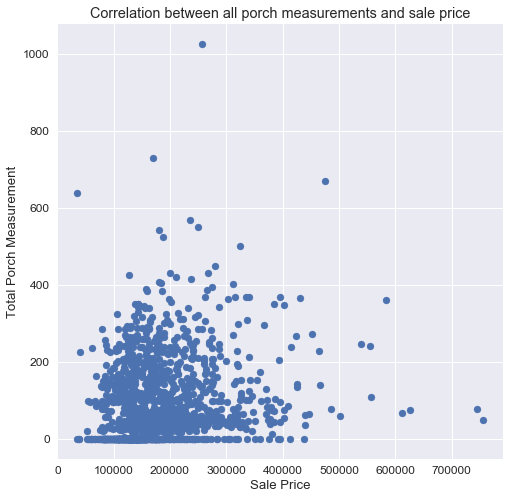

In [10]:
total_porch = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']
plt.figure(figsize=(8, 8))
plt.scatter(df['SalePrice'], total_porch)
plt.title('Correlation between all porch measurements and sale price')
plt.xlabel('Sale Price')
plt.ylabel('Total Porch Measurement')
plt.show()

## Removing Outliers ##

Outliers in the dataset will be removed using the **interquartile range (IQR)** IQR is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1. A low and high interquartile boundary of 5% and 95% respectively will be used in calculating the interquartile range. 

This boundary is chosen in order to avoid reducing the dataset to a small size (the current dataset is not very large). Also, only features that have a correlation of more than 0.5 to the sale price will have their outliers removed. Removing outliers from all features will effectively reduce this dataset significantly.

Features with correlation (positive or negative) greater than 0.5 are `GrLiveArea`, `TotalBsmtSF` and `1stFlrSF`.

In [11]:
# outlier_columns = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF']
# outlier_df = df[outlier_columns]
# low = .05
# high = .95
# iqr = outlier_df.quantile([low, high])

# outlier_df = outlier_df.apply(lambda x: x[(x > iqr.loc[low, x.name]) & (x < iqr.loc[high, x.name])], axis=0)
# df.drop(outlier_columns, axis=1, inplace=True)
# df = pd.concat([outlier_df, df], axis=1)
# # df.dropna(inplace=True)
# df.head()

In [12]:
df.shape

(1460, 80)

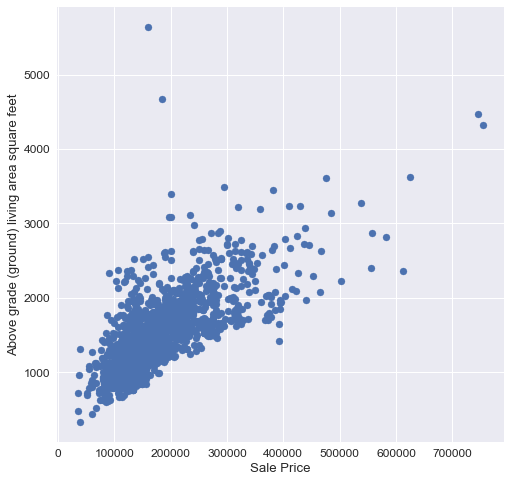

In [13]:
plt.figure(figsize=(8, 8))
plt.scatter(df['SalePrice'], df['GrLivArea'])
plt.xlabel('Sale Price')
plt.ylabel('Above grade (ground) living area square feet')
plt.show()

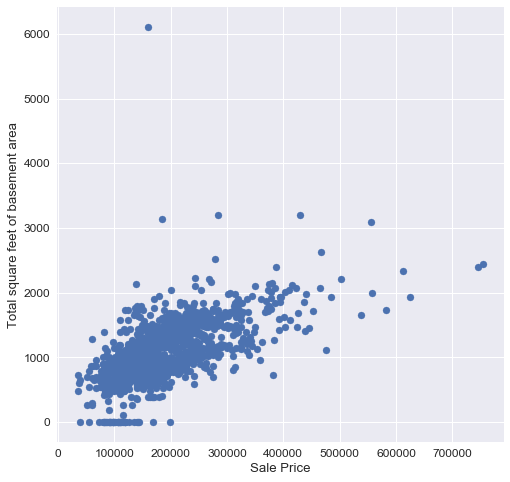

In [14]:
plt.figure(figsize=(8, 8))
plt.scatter(df['SalePrice'], df['TotalBsmtSF'])
plt.xlabel('Sale Price')
plt.ylabel('Total square feet of basement area')
plt.show()

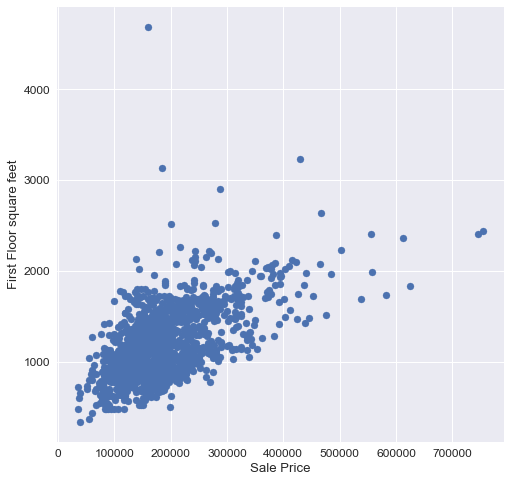

In [15]:
plt.figure(figsize=(8, 8))
plt.scatter(df['SalePrice'], df['1stFlrSF'])
plt.xlabel('Sale Price')
plt.ylabel('First Floor square feet')
plt.show()

# Feature Engineering #

## Separating ordinal from nominal features ##

Ordinal categorical features are those that can be sorted or ordered while nominal categorical features are not sorted or ordered. We will separate ordinal features from nominal features can encode each differently. Ordinal features will be encoded from lowest to highest while nominal features with be encoded using the one-hot encoding technique.

The table below shows the identified ordinal and nominal features in the data.

| Ordinal Features | Nominal Features |
|------------------|:----------------:|
| ExterQual        | MSSubClass       |
| ExterCond        | MSZoning         |
| BsmtQual         | Street**         |
| BsmtCond         | Alley            |
| BsmtExposure     | LandContour      |
| HeatingQC        | Utilities        |
| KitchenQual      | LotConfig        |
| FireplaceQu      | Neighborhood     |
| GarageFinish     | Condition1       |
| GarageQual       | Condition2       |
| GarageCond       | BldgType         |
| PavedDrive       | HouseStyle       |
| PoolQC           | RoofStyle        |
| LotShape         | RoofMatl         |
| LandSlope        | Exterior1st      |
|                  | Exterior2nd      |
|                  | MasVnrType       |
|                  | Foundation       |
|                  | BsmtFinType1     |
|                  | BsmtFinType2     |
|                  | Heating          |
|                  | Electrical       |
|                  | Functional       |
|                  | GarageType       |
|                  | Fence            |
|                  | MiscFeature      |
|                  | SaleType         |
|                  | SaleCondition    |
|                  | CentralAir**     |

`CentralAir` and `Street` is a binary classification, therefore it will be encoded manually.

In [16]:
# Map ordinal features to their corresponding integer values
# To avoid code duplication, we will add CentralAir and Street to the ordinals dictionary
ordinals = {
    'ExterQual': { 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1 },
    'ExterCond': { 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1 },
    'BsmtQual': { 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0 },
    'BsmtCond': { 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0 },
    'BsmtExposure': { 'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0 },
    'HeatingQC': { 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1 },
    'KitchenQual': { 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1 },
    'FireplaceQu': { 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0 },
    'GarageFinish': { 'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0 },
    'GarageQual': { 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0 },
    'GarageCond': { 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0 },
    'PavedDrive': { 'Y': 3, 'P': 2, 'N': 1 },
    'PoolQC': { 'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'NA': 0 },
    'LotShape': { 'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1 },
    'LandSlope': { 'Gtl': 3, 'Mod': 2, 'Sev': 1 },
    'CentralAir': { 'N': 0, 'Y': 1 },
    'Street': { 'Grvl': 1, 'Pave': 2 }
}

for key in list(ordinals.keys()):
    df[key] = df[key].map(ordinals[key])
    print('{} -> {}'.format(key, ordinals[key]))
    
df.head()

ExterQual -> {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
ExterCond -> {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
BsmtQual -> {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
BsmtCond -> {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
BsmtExposure -> {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}
HeatingQC -> {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
KitchenQual -> {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
FireplaceQu -> {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
GarageFinish -> {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0}
GarageQual -> {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
GarageCond -> {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
PavedDrive -> {'Y': 3, 'P': 2, 'N': 1}
PoolQC -> {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'NA': 0}
LotShape -> {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1}
LandSlope -> {'Gtl': 3, 'Mod': 2, 'Sev': 1}
CentralAir -> {'N': 0, 'Y': 1}
Street -> {'Grvl': 1, 'Pave': 2}


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,MSSSubClass_60,RL,65.0,8450,2,NA,4,Lvl,AllPub,Inside,...,0,0,NA,NA,0,2,2008,WD,Normal,208500
1,MSSSubClass_20,RL,80.0,9600,2,NA,4,Lvl,AllPub,FR2,...,0,0,NA,NA,0,5,2007,WD,Normal,181500
2,MSSSubClass_60,RL,68.0,11250,2,NA,3,Lvl,AllPub,Inside,...,0,0,NA,NA,0,9,2008,WD,Normal,223500
3,MSSSubClass_70,RL,60.0,9550,2,NA,3,Lvl,AllPub,Corner,...,0,0,NA,NA,0,2,2006,WD,Abnorml,140000
4,MSSSubClass_60,RL,84.0,14260,2,NA,3,Lvl,AllPub,FR2,...,0,0,NA,NA,0,12,2008,WD,Normal,250000


Pandas `get_dummies()` method will be used to one-hot encode the nominal features.

In [17]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,2,4,3,7,5,2003,2003,196.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,2,4,3,6,8,1976,1976,0.0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,2,3,3,7,5,2001,2002,162.0,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,2,3,3,7,5,1915,1970,0.0,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,2,3,3,8,5,2000,2000,350.0,...,0,0,0,0,1,0,0,0,1,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 234 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(3), int64(50), uint8(181)
memory usage: 862.7 KB


## Imputing missing values ##

In [19]:
df.describe()

,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1.995890,3.591781,2.937671,6.099315,5.575342,1971.267808,1984.865753,103.685262,...,0.003425,0.003425,0.083562,0.002055,0.867808,0.002740,0.008219,0.013699,0.820548,0.085616
std,24.284752,9981.264932,0.063996,0.582296,0.276232,1.382997,1.112799,30.202904,20.645407,181.066207,...,0.058440,0.058440,0.276824,0.045299,0.338815,0.052289,0.090317,0.116277,0.383862,0.279893
min,21.000000,1300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.000000,7553.500000,2.000000,3.000000,3.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,69.000000,9478.500000,2.000000,4.000000,3.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,80.000000,11601.500000,2.000000,4.000000,3.000000,7.000000,6.000000,2000.000000,2004.000000,166.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,313.000000,215245.000000,2.000000,4.000000,3.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


It is evident from the dataframe description that there are features that still contain `Null` or `NaN` values. The features with empty values are presented below.

In [20]:
def null_columns():
    columns = df.columns[df.isnull().any()]
    print(df[columns].isnull().sum())
    
null_columns()

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64


We will examine the definitions of these features in order to determine what steps to take in handling the `Null` values:
- `LotFrontage` is defined as "Linear feet of street connected to property". We could easily assign a value of 0 to this feature for those entries that do not have values. But considering that it is equally likely that a house can have a frontage lot or not, we will fill these empty values with the mean of the all values the feature.
- `MasVnrArea` is defined as "Masonry veneer area in square feet". Since there are only 8 values with `Null` we can easily verify that `MasVnrArea` corresponds to `MasVnrType` such that a house that does not belong to a `MasVnrType` also does not have a `MasVnrArea` value. We will assign the value 0 to these `NaN` values.
- `GarageYrBlt` is defined as "Year garage was built". We will replace these values with the mode value of the feature. Our assumption is that since most houses are about in a particular year, then we can as well use that year.
- `GrLivArea`, `TotalBsmtSF` and `1stFlrSF` have `NaN` values as a result of the removal of outliers. These rows will be removed.

We will use a customized implementation for imputing these values instead of `scikit-learn`'s implementation.

In [21]:
from scipy import stats

# LotFrontage
df['LotFrontage'].replace({np.nan: np.mean(df['LotFrontage'])}, inplace=True)

# MasVnrArea
df['MasVnrArea'].replace({np.nan: 0}, inplace=True)

# GarageYrBlt
mode, count = stats.mode(df['GarageYrBlt'], nan_policy='omit')
df['GarageYrBlt'].replace({np.nan: mode[0]}, inplace=True)

# Remove remaining NaN values gotten from removing outliers
df.dropna(inplace=True)

# Reset index
df = df.reset_index(drop=True)

In [22]:
null_columns()

Series([], dtype: float64)


## Combining/Engineering new features ##

From the description file provided, we can see that a few of the features are directly related to each other. We can combine some of these features into a single feature. The features to be considered are:

1. `BsmtFinSF1`, `BsmtFinSF2`, `BsmtUnfSF` and `TotalBsmtSF`. From the definition and inspection of the dataset, `TotalBsmtSF` is the combination (numerical addition) of the other three features. We will remove the three features from the dataset.
2. `1stFlrSF`, `2ndFlrSF` and `GrLivArea`. Similar to point 1, these features are related. `GrLivArea` is the combination of the first two features, therefore, those features will be dropped.
3. `BsmtFullBath`, `BsmtHalfBath`, `FullBath` and `HalfBath` all refer to the total number of bathrooms in a house. These features will be combined to one feature: `TotalBaths`.
4. `GarageCars` and `GarageArea` both measure the capacity of the garage of a house if one exists. They can be combined to a single feature measuring the area of garage per car: `GarageAreaPerCar`.
5. `OpenPorchSF`, `EnclosedPorch`, `3SsnPorch` and `ScreenPorch` all measure the size of the different porches in a house. These can be combined to one feature: `TotalPorchSize`.

In [23]:
# 1.
df.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], axis=1, inplace=True)

# 2. 
df.drop(['1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)

# 3. 
df['TotalBaths'] = df['BsmtFullBath'] + df['BsmtHalfBath'] + df['FullBath'] + df['HalfBath']
df.drop(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], axis=1, inplace=True)

# 4. 
df['GarageAreaPerCar'] = df['GarageArea'] / df['GarageCars']
df['GarageAreaPerCar'].replace({np.nan: 0}, inplace=True)  # Some values will equate to NaN because of 0 division
df.drop(['GarageCars', 'GarageArea'], axis=1, inplace=True)

# 5. 
df['TotalPorchSize'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']
df.drop(['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], axis=1, inplace=True)

df.head()

,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,TotalBaths,GarageAreaPerCar,TotalPorchSize
0,65.0,8450,2,4,3,7,5,2003,2003,196.0,...,0,1,0,0,0,1,0,4,274.000000,61
1,80.0,9600,2,4,3,6,8,1976,1976,0.0,...,0,1,0,0,0,1,0,3,230.000000,0
2,68.0,11250,2,3,3,7,5,2001,2002,162.0,...,0,1,0,0,0,1,0,4,304.000000,42
3,60.0,9550,2,3,3,7,5,1915,1970,0.0,...,0,1,0,0,0,0,0,2,214.000000,307
4,84.0,14260,2,3,3,8,5,2000,2000,350.0,...,0,1,0,0,0,1,0,4,278.666667,84


In [24]:
df.shape

(1460, 222)

## Feature Scaling ##

Now that all feature values have been converted to some form of number representation, we will scale features that have uneven units/measurements. Mean normalization scaling technique will be used on the following features:
- `LotFrontage`
- `LotArea`
- `MasVnrArea`
- `TotalBsmtSF`
- `LowQualFinSF`
- `GrLivArea`
- `TotalBaths`
- `BedroomAbvGr`
- `KitchenAbvGr`
- `TotRmsAbvGrd`
- `Fireplaces`
- `GarageAreaPerCar`
- `WoodDeckSF`
- `TotalPorchSize`
- `PoolArea`
- `MiscVal`

Before scaling these features, we can take a look at the relationships between some of them.

In [25]:
scale_columns = [ 'LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 
                 'TotalBaths', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageAreaPerCar', 
                 'WoodDeckSF', 'TotalPorchSize', 'PoolArea', 'MiscVal' ]

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(df[scale_columns])

# Make a new dataframe from returned scaled array
scaled_df = pd.DataFrame(scaled, columns=scale_columns)

# Drop previous columns from original dataframe and replace with scaled
# columns
df.drop(scale_columns, axis=1, inplace=True)
concatenated = [scaled_df, df]
df = pd.concat(concatenated, axis=1)
df.head()

,LotFrontage,LotArea,MasVnrArea,TotalBsmtSF,LowQualFinSF,GrLivArea,TotalBaths,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.229372,-0.207142,0.514104,-0.459303,-0.120242,0.370333,1.701318,0.163779,-0.211454,0.912210,...,0,0,0,0,1,0,0,0,1,0
1,0.451936,-0.091886,-0.570750,0.466465,-0.120242,-0.482512,0.617108,0.163779,-0.211454,-0.318683,...,0,0,0,0,1,0,0,0,1,0
2,-0.093110,0.073480,0.325915,-0.313369,-0.120242,0.515013,1.701318,0.163779,-0.211454,-0.318683,...,0,0,0,0,1,0,0,0,1,0
3,-0.456474,-0.096897,-0.570750,-0.687324,-0.120242,0.383659,-0.467101,0.163779,-0.211454,0.296763,...,0,0,0,0,1,0,0,0,0,0
4,0.633618,0.375148,1.366489,0.199680,-0.120242,1.299326,1.701318,1.390023,-0.211454,1.527656,...,0,0,0,0,1,0,0,0,1,0


In [27]:
null_columns()

Series([], dtype: float64)


# Training the model #

The dataset will be split into training and testing sets with a ration of 80% to 20% respectively.

In [141]:
from sklearn.model_selection import train_test_split

random_state = 42
target = np.log(df['SalePrice'])
features = df.drop('SalePrice', axis=1)

# Split data in 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.2, random_state=random_state)

print('Train features: {} \nTest features: {} \nTrain targets: {} \nTest targets: {}'
      .format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

Train features: (1168, 221) 
Test features: (292, 221) 
Train targets: (1168,) 
Test targets: (292,)


The performance of the model is evaluated on the Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.

In [29]:
def root_mean_square_error(y_true, y_pred):
#     return np.sqrt((np.log(y_true) - np.log(y_pred))**2)
    return np.sqrt((y_true - y_pred)**2)

## Compare different regressor algorithms ##

The following regressor algorithms will be compared using GridSearchCV
- Linear Regressor
- Random Forest Regressor
- Gradient Boosted Regressor
- Ada Boosted Regressor
- Decision Tree Regressor

The data will be trained on the default values of each algorithm to see which most applies to the dataset.

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, shuffle=True, random_state=random_state)

def experimentation_scores(scores):
    mean = scores.mean()
    return mean

c:\program files\python36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Decision Tree Regressor ###

In [31]:
model = DecisionTreeRegressor(random_state=random_state)
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
decision_tree_mean = experimentation_scores(scores)

### Linear Regression ###

In [32]:
model = LinearRegression()
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
lg_mean = experimentation_scores(scores)

### Gradient Boosting Regressor ###

In [33]:
model = GradientBoostingRegressor(random_state=random_state)
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
gb_mean = experimentation_scores(scores)

### Random Forest Regressor ###

In [34]:
model = RandomForestRegressor(random_state=random_state)
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
rf_mean = experimentation_scores(scores)

### Ada Boost Regressor ###

In [35]:
model = AdaBoostRegressor(random_state=random_state)
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
ab_mean = experimentation_scores(scores)

A bar chart of the resulting performance of each algorithm will provide us with an idea of the best performing algorithm among the tested algorithms.

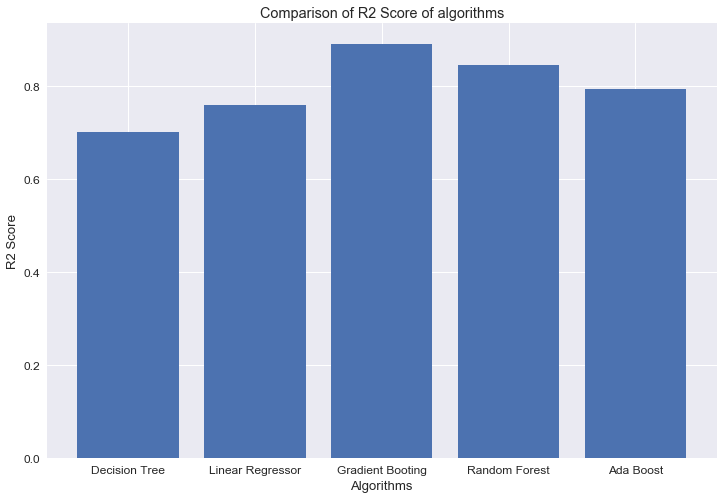

In [36]:
x = np.arange(5)
plt.figure(figsize=(12, 8))
plt.bar(x, [abs(decision_tree_mean), abs(lg_mean), abs(gb_mean), abs(rf_mean), abs(ab_mean)])
plt.xticks(x, ('Decision Tree', 'Linear Regressor', 'Gradient Booting', 'Random Forest', 'Ada Boost'))
plt.title('Comparison of R2 Score of algorithms')
plt.xlabel('Algorithms')
plt.ylabel('R2 Score')
plt.show()

`GradientBootingRegressor` edges out the other algorithms. We'll tune this model to train our data.

## Fine-Tuning Model ##

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

### Randomized Serch Cross Validation ###

`RandomizedSearchCV` is a class provided by `scikit-learn` that will experiment with hyperparameters, tuning the model to determine which combination of hyperparameters gives the best outcome. `RandomizedSearchCV` randomly combines hyperparameters in each iteration.

It is important to note that `RandomizedSearchCV` can give different hyperparameter combination when run multiple time.

In [38]:
scoring = 'r2'
n_iter = 50
n_jobs = -1
param_distributions = { 'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100], 'min_samples_leaf': np.arange(1, 10), 
                        'min_samples_split': np.arange(2, 10), 'max_depth': np.arange(1, 10) }

model = GradientBoostingRegressor(random_state=random_state)
random_search = RandomizedSearchCV(model, param_distributions=param_distributions, n_iter=n_iter, scoring=scoring, 
                                   n_jobs=n_jobs, cv=cv, verbose=1)
random_search.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  8.3min finished


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
          error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=50, n_jobs=-1,
          param_distributions={'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100], 'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]), 'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='r2', verbos

In [39]:
random_search.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=2,
             min_samples_split=8, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

We can convert the cross validation results to a pandas dataframe to view how `RandomizedSearchCV` tuned the model.

In [40]:
random_search_results = pd.DataFrame(random_search.cv_results_).sort_values('mean_test_score', ascending=False)
random_search_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_learning_rate,params,split0_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
3,0.940745,0.018673,0.001598,0.001957,8,2,3,0.1,"{'min_samples_split': 8, 'min_samples_leaf': 2...",8.350684e-01,...,9.590280e-01,9.576336e-01,9.565677e-01,9.590845e-01,9.577069e-01,9.585555e-01,9.571955e-01,9.602138e-01,9.584375e-01,1.547372e-03
8,5.573892,0.092057,0.004421,0.001701,8,6,8,0.1,"{'min_samples_split': 8, 'min_samples_leaf': 6...",8.433197e-01,...,9.969950e-01,9.959573e-01,9.974010e-01,9.973802e-01,9.969869e-01,9.974519e-01,9.966932e-01,9.970368e-01,9.969768e-01,4.765805e-04
48,6.635332,0.092400,0.003873,0.001420,2,4,9,0.1,"{'min_samples_split': 2, 'min_samples_leaf': 4...",8.276319e-01,...,9.994280e-01,9.991399e-01,9.993036e-01,9.992870e-01,9.992542e-01,9.993961e-01,9.993388e-01,9.993612e-01,9.993324e-01,9.646628e-05
20,5.984490,0.106141,0.004959,0.001583,7,7,9,0.1,"{'min_samples_split': 7, 'min_samples_leaf': 7...",8.415543e-01,...,9.972197e-01,9.965878e-01,9.969390e-01,9.972258e-01,9.970375e-01,9.972963e-01,9.967407e-01,9.972672e-01,9.970501e-01,2.797424e-04
49,0.339081,0.048283,0.001667,0.001695,2,3,1,0.1,"{'min_samples_split': 2, 'min_samples_leaf': 3...",8.152378e-01,...,8.773301e-01,8.764080e-01,8.747062e-01,8.882843e-01,8.748064e-01,8.755717e-01,8.761841e-01,8.790366e-01,8.774232e-01,4.497337e-03
19,0.904533,0.029351,0.003785,0.001384,4,5,2,1,"{'min_samples_split': 4, 'min_samples_leaf': 5...",7.115928e-01,...,9.728091e-01,9.736285e-01,9.748234e-01,9.755504e-01,9.751319e-01,9.764674e-01,9.731177e-01,9.760106e-01,9.750454e-01,1.391739e-03
28,1.552745,0.027240,0.001797,0.001830,2,8,3,1,"{'min_samples_split': 2, 'min_samples_leaf': 8...",7.733522e-01,...,9.928987e-01,9.930298e-01,9.922535e-01,9.935119e-01,9.931590e-01,9.935871e-01,9.929561e-01,9.934220e-01,9.931118e-01,4.272447e-04
44,3.873718,0.151185,0.001951,0.001526,8,9,6,1,"{'min_samples_split': 8, 'min_samples_leaf': 9...",6.846594e-01,...,9.999974e-01,9.999857e-01,9.999835e-01,9.999943e-01,9.999956e-01,9.999921e-01,9.999924e-01,9.999923e-01,9.999918e-01,4.054381e-06
43,8.344015,0.119563,0.004796,0.002811,9,4,8,0.01,"{'min_samples_split': 9, 'min_samples_leaf': 4...",7.376927e-01,...,8.279339e-01,8.244835e-01,8.259156e-01,8.273342e-01,8.236586e-01,8.273686e-01,8.259849e-01,8.277849e-01,8.265834e-01,1.438798e-03
37,7.204301,0.094090,0.004121,0.000350,8,8,8,0.01,"{'min_samples_split': 8, 'min_samples_leaf': 8...",7.375898e-01,...,8.057777e-01,8.059029e-01,8.052852e-01,8.087671e-01,8.037091e-01,8.057891e-01,8.051633e-01,8.073316e-01,8.056453e-01,1.711121e-03


### Grid Search Cross Validation ###

The tuned hyperparameters from `RandomizedSearchCV` will be further tuned using `GridSearchCV`. The parameter we are interested in tuning using `GridSearchCV` is the `n_estimators` hyperparameter. `n_estimators` is the number of boosting stage to perform and since gradient boosting is susceptible to overfitting, we will tune of high values of `n_estimators`. We are using grid search for tuning because, unlike randomized search cross validation that randomly pick hypterparameters to tune, grid search cross validation combines all combinations of hyperparameters to determine the optimum combination.

In [41]:
param_grid = [{ 'n_estimators': [100, 150, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1150, 2000] }]

grid_search = GridSearchCV(random_search.best_estimator_, param_grid, cv=cv, scoring=scoring, 
                           n_jobs=n_jobs, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 13 candidates, totalling 130 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:  5.6min finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
       error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=2,
             min_samples_split=8, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'n_estimators': [100, 150, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1150, 2000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=1)

In [42]:
grid_search.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=2,
             min_samples_split=8, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [43]:
grid_search_results = pd.DataFrame(grid_search.cv_results_)
grid_search_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,1.549380,0.099458,0.002080,0.001410,100,{'n_estimators': 100},0.835068,0.925830,0.895751,0.877457,...,0.959028,0.957634,0.956568,0.959085,0.957707,0.958555,0.957195,0.960214,0.958438,0.001547
1,2.465373,0.173256,0.002867,0.002451,150,{'n_estimators': 150},0.834805,0.929853,0.898848,0.879312,...,0.969161,0.967291,0.966201,0.969001,0.968062,0.968144,0.966905,0.969772,0.968259,0.001376
2,3.101615,0.223261,0.003410,0.003080,200,{'n_estimators': 200},0.836200,0.930950,0.900716,0.877300,...,0.975378,0.973468,0.972656,0.975398,0.974538,0.974934,0.973802,0.975820,0.974702,0.001263
3,4.537221,0.254116,0.003969,0.001952,300,{'n_estimators': 300},0.835237,0.932962,0.903393,0.876197,...,0.983749,0.982640,0.981382,0.984036,0.982954,0.983724,0.982704,0.983526,0.983192,0.000833
4,5.647151,0.134689,0.003918,0.001091,400,{'n_estimators': 400},0.834820,0.934191,0.903632,0.875760,...,0.988401,0.988196,0.987169,0.988956,0.987955,0.989309,0.987814,0.988317,0.988335,0.000646
5,7.000122,0.084720,0.004419,0.001400,500,{'n_estimators': 500},0.833458,0.934525,0.904659,0.874425,...,0.991584,0.991619,0.991055,0.992440,0.991200,0.992304,0.991250,0.991703,0.991699,0.000507
6,8.659924,0.206093,0.007780,0.004678,600,{'n_estimators': 600},0.832643,0.935046,0.904083,0.875257,...,0.994034,0.994069,0.993521,0.994378,0.993605,0.994450,0.993675,0.993969,0.993985,0.000344
7,10.098401,0.119466,0.006414,0.002429,700,{'n_estimators': 700},0.831947,0.935668,0.905069,0.875558,...,0.995628,0.995727,0.995261,0.995749,0.995352,0.996031,0.995307,0.995528,0.995601,0.000257
8,11.393906,0.083589,0.006851,0.001590,800,{'n_estimators': 800},0.830811,0.935510,0.904629,0.875041,...,0.996707,0.996828,0.996392,0.996706,0.996512,0.997024,0.996413,0.996667,0.996677,0.000211
9,12.939594,0.175586,0.006869,0.001764,900,{'n_estimators': 900},0.830350,0.935291,0.904430,0.874994,...,0.997501,0.997538,0.997205,0.997426,0.997277,0.997760,0.997306,0.997468,0.997457,0.000173


We can visualize the training and validation errors for the number of tree/estimators that were tuned.

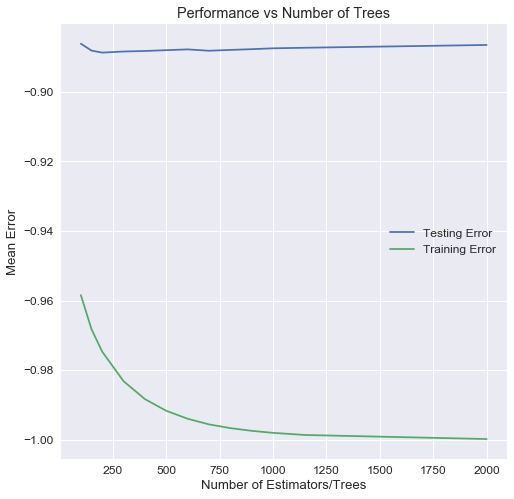

In [44]:
plt.figure(figsize=(8, 8))
plt.plot(grid_search_results['param_n_estimators'], -1*grid_search_results['mean_test_score'], 
         label='Testing Error')
plt.plot(grid_search_results['param_n_estimators'], -1*grid_search_results['mean_train_score'], 
         label='Training Error')
plt.xlabel('Number of Estimators/Trees')
plt.ylabel('Mean Error')
plt.legend()
plt.title('Performance vs Number of Trees')
plt.show()

### Train model ###

The model will then be trained using the final tuned hyperparameters of the grid search cross validation.

In [142]:
model = grid_search.best_estimator_
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=2,
             min_samples_split=8, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [143]:
predictions = model.predict(X_test)

# Evaluate Model #

The performance of the model is evaluated using the r2 score and root mean square error. `scikit-learn` provides us with functions to perform r2 score evaluation while the root_mean_square_error function will handle RMSE.

In [144]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)

random_val = np.random.randint(1, len(y_test))
test = y_test[random_val:random_val+1]
pred = predictions[random_val]
rmse = root_mean_square_error(test, pred)

print('R2 Score: %.3f' % r2)

R2 Score: 0.898


The plot below compares the predictions of the model with the corresponding ground-truth values.

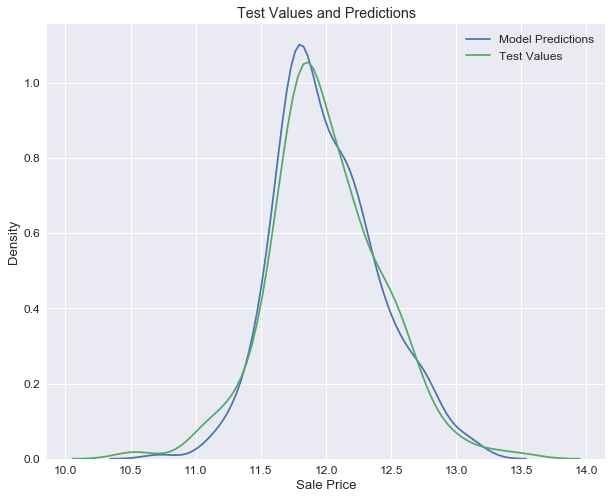

In [145]:
def evaluation_plot(y_test, predictions):
    plt.figure(figsize=(10, 8))

    # Density plot of the final predictions and the test values
    sns.kdeplot(predictions, label='Model Predictions')
    sns.kdeplot(y_test, label='Test Values')

    # Label the plot
    plt.xlabel('Sale Price')
    plt.ylabel('Density')
    plt.title('Test Values and Predictions')
    plt.show()

evaluation_plot(y_test, predictions)

# Feature Importances #

We can take a look at the features that are most important in determining how well the model predicts sales prices. We will pick the top 50 features. This is also a way of scaling down the number of features from its bloated size. Only features that have significant impact in prediction will be used.

In [128]:
def importance_dataframe(features, importance):
    importance_df = pd.DataFrame({'Features': features, 'Importance': importance})
    importance_df = importance_df.sort_values('Importance', ascending=False).reset_index(drop=True)
    return importance_df.head(50)

importance = model.feature_importances_
importance_df = importance_dataframe(features.columns, importance)

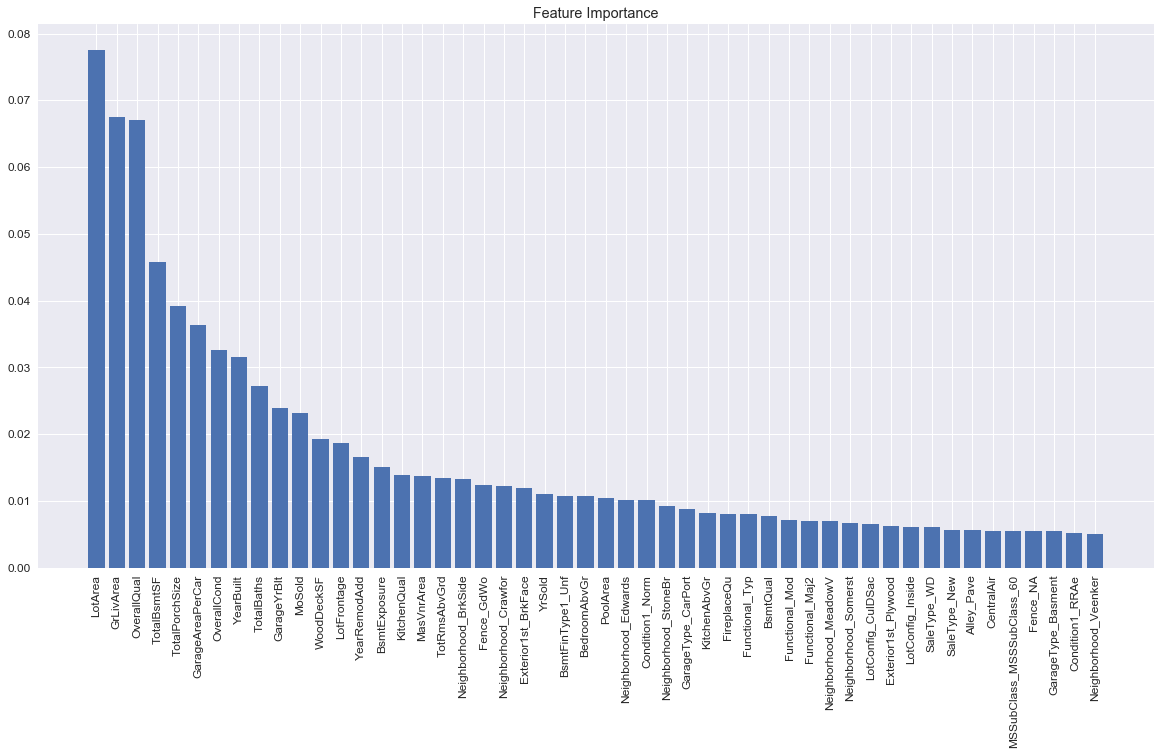

In [129]:
def importance_bar(features, importance, figsize=(20, 10)):
    plt.figure(figsize=figsize)
    plt.title('Feature Importance')
    plt.bar(features, importance, align='center')
    plt.xticks(features, rotation=90)
    plt.show()

importance_bar(importance_df['Features'], importance_df['Importance'])

The bar chart shows the top 50 most important features in order of their weights. A threshold of 0.03 will be set as the threshold to produce the features that will be considered most important to the model.

In [130]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(model, threshold=.03, prefit=True)
selected_features = sfm.transform(X_train)
print('Number of features that meet the threshold criterion: {}'.format(selected_features.shape[1]))

Number of features that meet the threshold criterion: 8


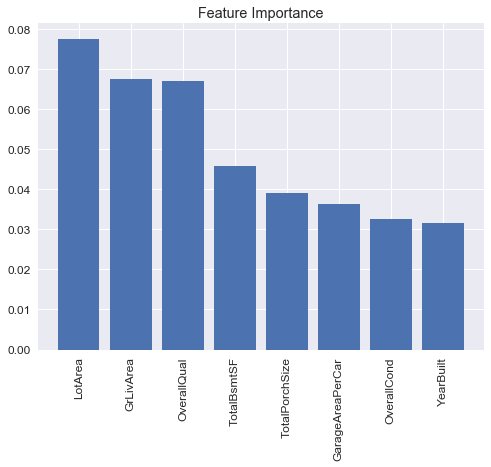

In [131]:
selected_fts, selected_importance = [], []

for i in range(selected_features.shape[1]):
    selected_fts.append(importance_df['Features'][i])
    selected_importance.append(importance_df['Importance'][i])
    
selected_df = importance_dataframe(selected_fts, selected_importance)
importance_bar(selected_df['Features'], selected_df['Importance'], figsize=(8, 6))

Based on the set threshold of 0.03, the important features for the model are `LotArea`, `GrLivArea`, `OverallQual`, `TotalBsmtSF`, `TotalPorchSize`, `GarageAreaPerCar`, `OverallCond`, `YearBuilt` with `LotArea`, `GrLivArea` and `OverallQual` having the most influence in determining the sales price of a house. These features seem reasonable from a layman's perspective, when considering sales prices.

# Save Model #

In [134]:
from sklearn.externals import joblib
import time

if not os.path.exists('models'):
    os.mkdir('models')

joblib.dump(model, os.path.join('models', 'model_v1_{}.joblib'.format(time.time())))

['models\\model_v1_1539444900.0719414.joblib']

# Train new model with select feature importances #

In [136]:
new_data = features[selected_df['Features']]
new_data.head()

,LotArea,GrLivArea,OverallQual,TotalBsmtSF,TotalPorchSize,GarageAreaPerCar,OverallCond,YearBuilt
0,-0.207142,0.370333,7,-0.459303,-0.248063,0.194077,5,2003
1,-0.091886,-0.482512,6,0.466465,-0.828163,-0.306335,8,1976
2,0.073480,0.515013,7,-0.313369,-0.428750,0.535267,5,2001
3,-0.096897,0.383659,7,-0.687324,2.091355,-0.488303,5,1915
4,0.375148,1.299326,8,0.199680,-0.029337,0.247151,5,2000


In [146]:
# Split data into test and train sets
X_selected_train, X_selected_test, y_selected_train, y_selected_test = train_test_split(new_data, target, 
                                                                                        test_size=.2, random_state=random_state)

model.fit(X_selected_train, y_selected_train)
pred_selected = model.predict(X_selected_test)

r2 = r2_score(y_selected_test, pred_selected)
print('R2 Score: %.3f' % r2)

R2 Score: 0.887


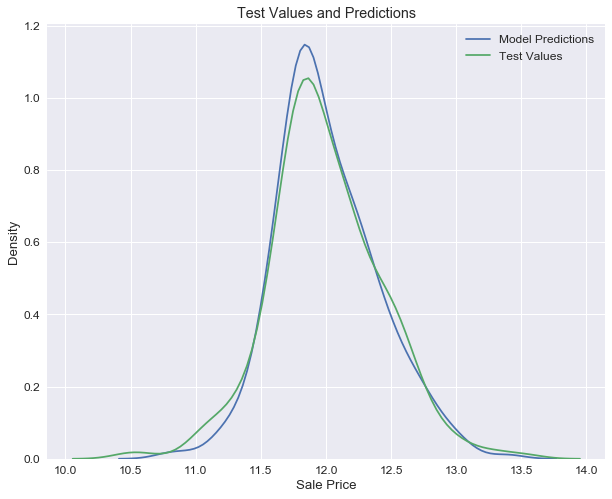

In [147]:
evaluation_plot(y_selected_test, pred_selected)

In [150]:
if not os.path.exists('models'):
    os.mkdir('models')

joblib.dump(model, os.path.join('models', 'model_final.joblib'))

['models\\model_final.joblib']

# Conclusion #

The model clearly has room for improvement which can come about by some more feature engineering and selection. Fortunately, the model, being an ensemble algorithm, is robust to outliers. So with better feature engineering, the model is likely to perform much better.